In [ ]:
import tensorflow as tf # 2.3
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.datasets.mnist as mnist

Import les donées 导入数据

In [ ]:
(train_image, train_labels), (test_image, test_labels) = tf.keras.datasets.mnist.load_data()
# train_image.shape = (60000, 28, 28), train_labels.shape = (60000,)

11490434/11490434 [==============================] - 0s 0us/step


Traitement les données 数据处理

In [ ]:
# Normalisation les données 0 - 255 en -1 - 1
train_image = (train_image - 127.5)/127.5 # 把0-255的数据范围变为-1到1之间
test_image = (test_image - 127.5)/127.5 # 把0-255的数据范围变为-1到1之间

# Augmenter la dimension du canal 增加通道维度
#train_image = tf.expand_dims(train_image, -1)
#test_image = tf.expand_dims(test_image, -1)
# train_image.shape = ([60000, 28, 28, 1]), train_labels.shape = (60000,)

# Transformation de type 类型转换
train_image = tf.cast(train_image, tf.float32)
test_image = tf.cast(test_image, tf.float32)
train_labels = tf.cast(train_labels, tf.int64)
test_labels = tf.cast(test_labels, tf.int64)

Créer un jeu de données 创建数据集

In [ ]:
# 创建Dataset
dataset = tf.data.Dataset.from_tensor_slices((train_image, train_labels)).shuffle(60000).batch(256)
test_dataset = tf.data.Dataset.from_tensor_slices((test_image, test_labels)).batch(256)

## Construire le modèle MLP et l'entraîner 搭建MLP模型并训练

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
optimizer = tf.keras.optimizers.Adam()
loss_func = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=optimizer,loss=loss_func,metrics=['acc'])
history = model.fit(dataset,validation_data=test_dataset,epochs=10) # 返回字典类型的数据 其中记录了准确率和损失的信息

Epoch 1/10
235/235 [==============================] - 5s 17ms/step - loss: 0.4658 - acc: 0.8608 - val_loss: 0.2563 - val_acc: 0.9241
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.2193 - acc: 0.9348 - val_loss: 0.1744 - val_acc: 0.9470
Epoch 3/10
235/235 [==============================] - 3s 13ms/step - loss: 0.1635 - acc: 0.9509 - val_loss: 0.1614 - val_acc: 0.9516
Epoch 4/10
235/235 [==============================] - 3s 10ms/step - loss: 0.1322 - acc: 0.9611 - val_loss: 0.1238 - val_acc: 0.9602
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1090 - acc: 0.9676 - val_loss: 0.1219 - val_acc: 0.9649
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0966 - acc: 0.9699 - val_loss: 0.1156 - val_acc: 0.9658
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0841 - acc: 0.9742 - val_loss: 0.0946 - val_acc: 0.9696
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - 

##Implémenter FGSM(Fast Gradient Sign Method)
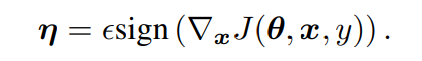

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    loss = loss_object(input_label, prediction)
  gradient = tape.gradient(loss, input_image)
  # Utiliser la fonction signe sur le gradient pour créer une perturbation对梯度使用sign函数，创建扰动
  signed_grad = tf.sign(gradient)
  return signed_grad

In [ ]:
perturbations = create_adversarial_pattern(test_image, test_labels)

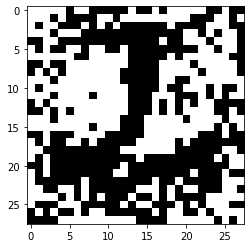

In [ ]:
#check la première perturbation 查看第一个扰动
plt.imshow(perturbations[0],cmap='gray_r')#image en niveaux de gris

Définir une fonction pour plot les images

In [ ]:
# image: Ensemble d'images originales
# label: Ensemble d'étiquette true par le modèle d'image d'origine
# adv_lable: Ensemble d'étiquette prédite par le modèle après l'ajout de la perturbation
# num: Le nombre d'image d'afficher
def display_images(image, label,adv_label, num = 10):
  fig = plt.figure(figsize=(2*num,3)) # figsize:指定figure的宽和高，单位为英寸
  for i in range(num):   # pre_image的shape的第一个维度就是个数，这里是num
      plt.subplot(1,num,i+1) # 几行几列的 第i+1个图片（从1开始）
      plt.imshow(image[i,:,:],cmap='gray') # + 1)/2) # 加1除2: 将生成的-1～1的图片弄到0-1之间,
      plt.title('{} -> {}'.format(label[i],adv_label[i]))
      plt.axis('off') # 不要坐标
  plt.show()


##Ajouter la perturbations et Tester dans le jeu de test

epsilons = 0:
313/313 [==============================] - 1s 4ms/step


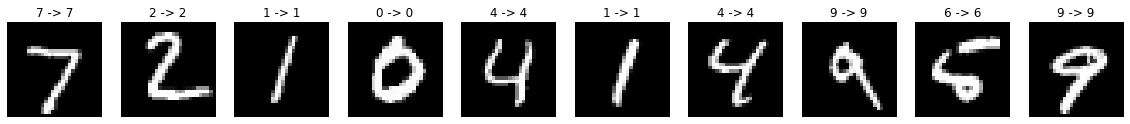

epsilons = 0.05:
313/313 [==============================] - 1s 2ms/step


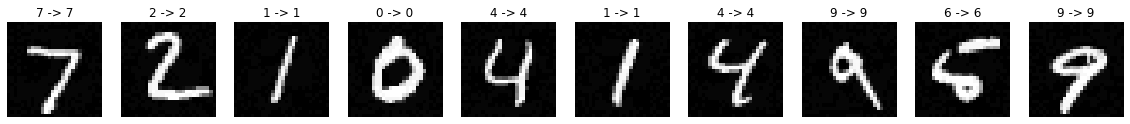

epsilons = 0.1:
313/313 [==============================] - 1s 2ms/step


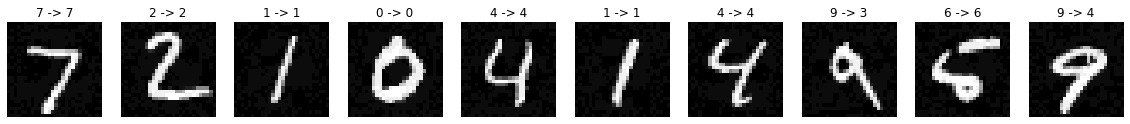

epsilons = 0.15:
313/313 [==============================] - 1s 2ms/step


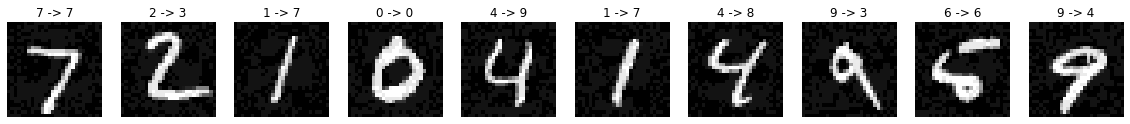

epsilons = 0.2:
313/313 [==============================] - 1s 2ms/step


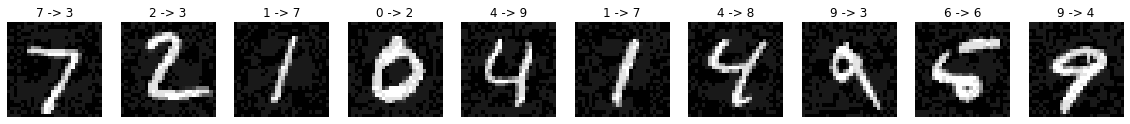

epsilons = 0.25:
313/313 [==============================] - 1s 2ms/step


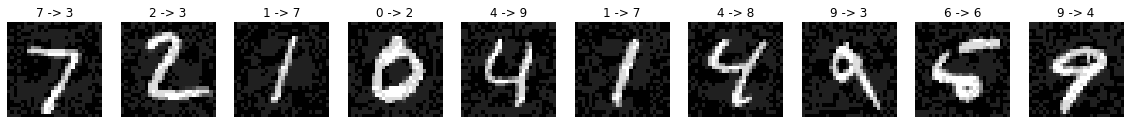

epsilons = 0.3:
313/313 [==============================] - 1s 2ms/step


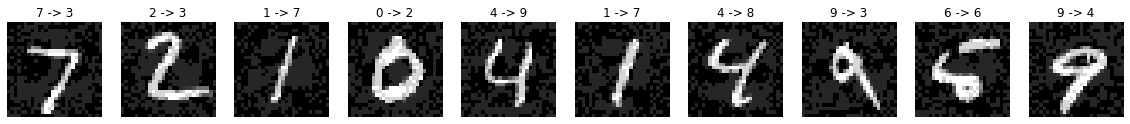

In [ ]:
# Tester dans les différentes valeurs d'epsilon 在不同的epsilons进行测试
epsilons = [0,0.05,0.10,0.15,0.20,0.25,0.30]
adv_acc_list = []
for i, eps in enumerate(epsilons):
  print("epsilons = {}:".format(eps))
  # Obtenir le résultat de la prédiction de l'image d'origine 获取原始图片的预测结果
  test_image = tf.clip_by_value(test_image, -1, 1)
  predict_label = model.predict(test_image)
  predict_label = np.array([np.argmax(i) for i in predict_label])
  # Générer des adversarial pattern et obtenir des résultats de prédiction 生成对抗样本，并获取预测结果
  adv_image = test_image + eps*perturbations
  adv_image = tf.clip_by_value(adv_image, -1, 1)
  adv_predict_label = model.predict(adv_image)
  adv_predict_label = np.array([np.argmax(i) for i in adv_predict_label])
  # Évaluer le modèle sur un ensemble d'exemples adversarial 在对抗样本集合中评估模型
  score = model.evaluate(adv_image,test_labels,verbose=0)
  adv_acc_list.append(score[1])
  # plot
  display_images(adv_image,predict_label,adv_predict_label, 10)

## L’entraînement contradictoire 对抗训练



In [ ]:
perturb = create_adversarial_pattern(train_image, train_labels)
train_adv = train_image+0.3*perturb
train_train_adv = tf.concat([train_image, train_adv], 0) #对抗训练集 = 原训练集+加了扰动的训练集 （120000 images） 
print(np.shape(train_train_adv))
labels_label_adv = tf.concat([train_labels, train_labels], 0)  #labels = 2*原labels，因为加了扰动的图像还属于该标签

(120000, 28, 28)


In [ ]:
dataset_adv = tf.data.Dataset.from_tensor_slices((train_train_adv, labels_label_adv)).shuffle(120000).batch(256)
test_dataset = tf.data.Dataset.from_tensor_slices((test_image, test_labels)).batch(256)

In [ ]:
model_adv = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
optimizer_adv = tf.keras.optimizers.Adam()
loss_func_adv = tf.keras.losses.SparseCategoricalCrossentropy()
model_adv.compile(optimizer=optimizer,loss=loss_func_adv,metrics=['acc'])
history = model_adv.fit(dataset_adv,validation_data=test_dataset,epochs=10) # 用新合并的对抗训练集训练

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3425 - acc: 0.8969 - val_loss: 0.2585 - val_acc: 0.9228
Epoch 2/10
469/469 [==============================] - 4s 7ms/step - loss: 0.1465 - acc: 0.9574 - val_loss: 0.1907 - val_acc: 0.9450
Epoch 3/10
469/469 [==============================] - 4s 7ms/step - loss: 0.1093 - acc: 0.9681 - val_loss: 0.1630 - val_acc: 0.9517
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0891 - acc: 0.9732 - val_loss: 0.1585 - val_acc: 0.9521
Epoch 5/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0769 - acc: 0.9768 - val_loss: 0.1290 - val_acc: 0.9625
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0683 - acc: 0.9796 - val_loss: 0.1316 - val_acc: 0.9615
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0610 - acc: 0.9812 - val_loss: 0.1105 - val_acc: 0.9653
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0

epsilons = 0:
313/313 [==============================] - 1s 2ms/step


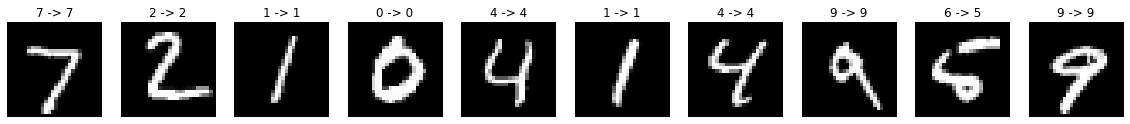

epsilons = 0.05:
313/313 [==============================] - 1s 2ms/step


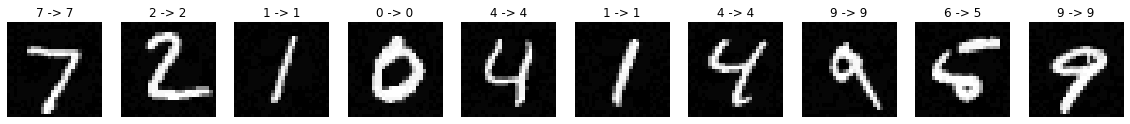

epsilons = 0.1:
313/313 [==============================] - 1s 2ms/step


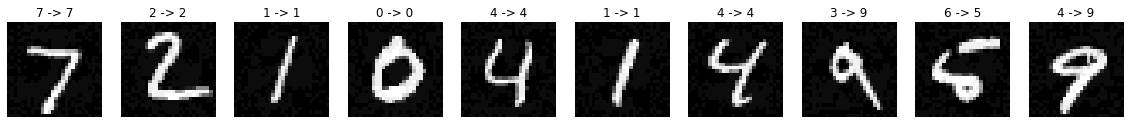

epsilons = 0.15:
313/313 [==============================] - 1s 3ms/step


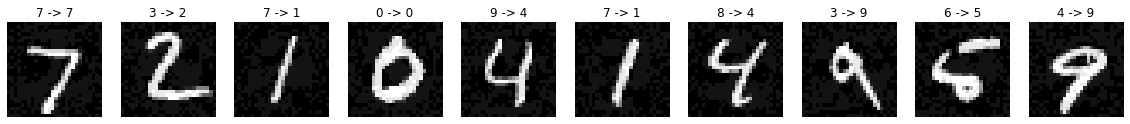

epsilons = 0.2:
313/313 [==============================] - 1s 2ms/step


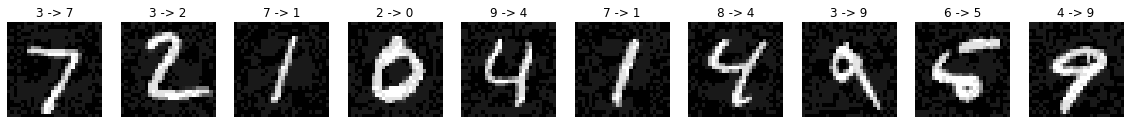

epsilons = 0.25:
313/313 [==============================] - 1s 3ms/step


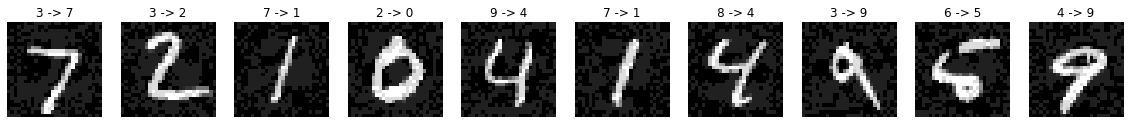

epsilons = 0.3:
313/313 [==============================] - 1s 3ms/step


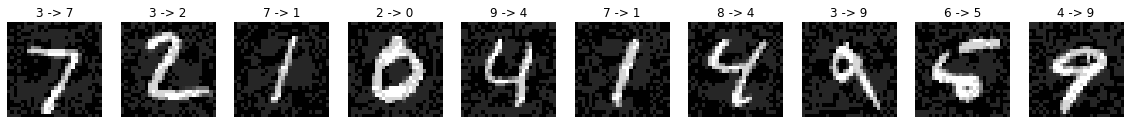

In [ ]:
# Tester dans les différentes valeurs d'epsilon 在不同的epsilons进行测试
epsilons = [0,0.05,0.10,0.15,0.20,0.25,0.30]
adv_acc_list = []
acc_list = []
for i, eps in enumerate(epsilons):
  print("epsilons = {}:".format(eps))
  adv_image = test_image + eps*perturbations      # 对抗样本测试集=测试集加上干扰
  adv_image = tf.clip_by_value(adv_image, -1, 1)
  # Obtenir le résultat de la prédiction de l'image d'origine 获取原始图片的预测结果
  #test_image = tf.clip_by_value(adv_image, -1, 1)
  predict_label = model.predict(adv_image) 
  predict_label = np.array([np.argmax(i) for i in predict_label])
  # Générer des adversarial pattern et obtenir des résultats de prédiction 生成对抗样本，并获取预测结果
  adv_predict_label = model_adv.predict(adv_image)
  adv_predict_label = np.array([np.argmax(i) for i in adv_predict_label])
  # Évaluer le modèle sur un ensemble d'exemples adversarial 在对抗样本集合中评估模型
  score1 = model.evaluate(adv_image,test_labels,verbose=0)
  acc_list.append(score1[1])
  score = model_adv.evaluate(adv_image,test_labels,verbose=0)
  adv_acc_list.append(score[1])
  # plot
  display_images(adv_image,predict_label,adv_predict_label, 10)

  ## 输出标签：原模型对对抗样例的预测 -> 用对抗训练的模型对对抗样例的预测

Afficher la précision en fonction d'epsilons

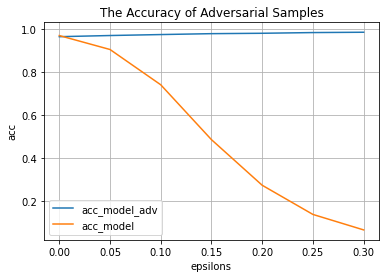

acc [0.9659000039100647, 0.9713000059127808, 0.9757999777793884, 0.9800000190734863, 0.9818000197410583, 0.9850999712944031, 0.9865999817848206]
epsilons [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]


In [ ]:
plt.figure()
plt.plot(epsilons,adv_acc_list,label='acc_model_adv')
plt.plot(epsilons,acc_list,label='acc_model')
plt.title("The Accuracy of Adversarial Samples")
plt.xlabel("epsilons")
plt.ylabel("acc")
plt.legend()
plt.grid()
plt.show()
print('acc',adv_acc_list)
print('epsilons',epsilons)

In [ ]:
# 